In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

boston = load_boston()

In [5]:
boston.feature_names
X=pd.DataFrame(boston.data[:,:], columns=boston.feature_names)
y=pd.DataFrame(boston.target[:],columns=['MEDV'])

In [6]:
X = X[['LSTAT']].values
y = y['MEDV'].values

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [10]:
print('Train score: {}'.format(tree.score(X_train, y_train)))
print('Test score: {}'.format(tree.score(X_test, y_test)))

Train score: 0.7362854637034488
Test score: 0.5159346763007029


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 学習データを読み込む
train = np.loadtxt('testdata/images2.csv', delimiter=',', skiprows=1)
train_x = train[:,0:2]
train_y = train[:,2]

# パラメータを初期化
theta = np.random.rand(3)

# 標準化
mu = train_x.mean(axis=0)
sigma = train_x.std(axis=0)
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# x0を加える
def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    return np.hstack([x0, x])

X = to_matrix(train_z)

# シグモイド関数
def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

# 分類関数
def classify(x):
    return (f(x) >= 0.5).astype(np.int)

# 学習率
ETA = 1e-3

# 繰り返し回数
epoch = 5000

# 更新回数
count = 0

# 学習を繰り返す
for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)

    # ログの出力
    count += 1
    print('{}回目: theta = {}'.format(count, theta))

1回目: theta = [ 0.99651969  0.0857586   0.43410493]
2回目: theta = [ 0.993092    0.09189546  0.42966773]
3回目: theta = [ 0.98967639  0.09801362  0.425238  ]
4回目: theta = [ 0.98627289  0.10411304  0.42081585]
5回目: theta = [ 0.98288154  0.11019369  0.41640134]
6回目: theta = [ 0.97950239  0.11625554  0.41199457]
7回目: theta = [ 0.97613547  0.12229856  0.40759561]
8回目: theta = [ 0.97278082  0.12832273  0.40320454]
9回目: theta = [ 0.96943848  0.13432801  0.39882145]
10回目: theta = [ 0.96610848  0.14031438  0.39444642]
11回目: theta = [ 0.96279086  0.14628181  0.39007952]
12回目: theta = [ 0.95948565  0.15223027  0.38572084]
13回目: theta = [ 0.95619288  0.15815976  0.38137044]
14回目: theta = [ 0.9529126   0.16407023  0.37702841]
15回目: theta = [ 0.94964482  0.16996168  0.37269483]
16回目: theta = [ 0.94638958  0.17583409  0.36836976]
17回目: theta = [ 0.9431469   0.18168743  0.36405329]
18回目: theta = [ 0.93991681  0.18752169  0.35974548]
19回目: theta = [ 0.93669935  0.19333685  0.35544641]
20回目: theta = [ 0.933

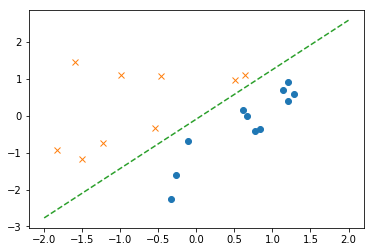

In [2]:
# プロットして確認
x0 = np.linspace(-2, 2, 100)
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.plot(x0, -(theta[0] + theta[1] * x0) / theta[2], linestyle='dashed')
plt.show()